### Question 3

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plts
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Interactive widget
from ipywidgets import interact


# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [18]:
path="/home/rishabh.mondal/ml_course_group/assignment_3/co2_mm_mlo.csv"
names = 'year,month,decimal date,average,deseasonalized,ndays,sdev,unc'.split(',')
df=pd.read_csv(path,index_col=False)
df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))

/tmp/ipykernel_1682162/3007595499.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))


Text(0, 0.5, 'CO2 Level')

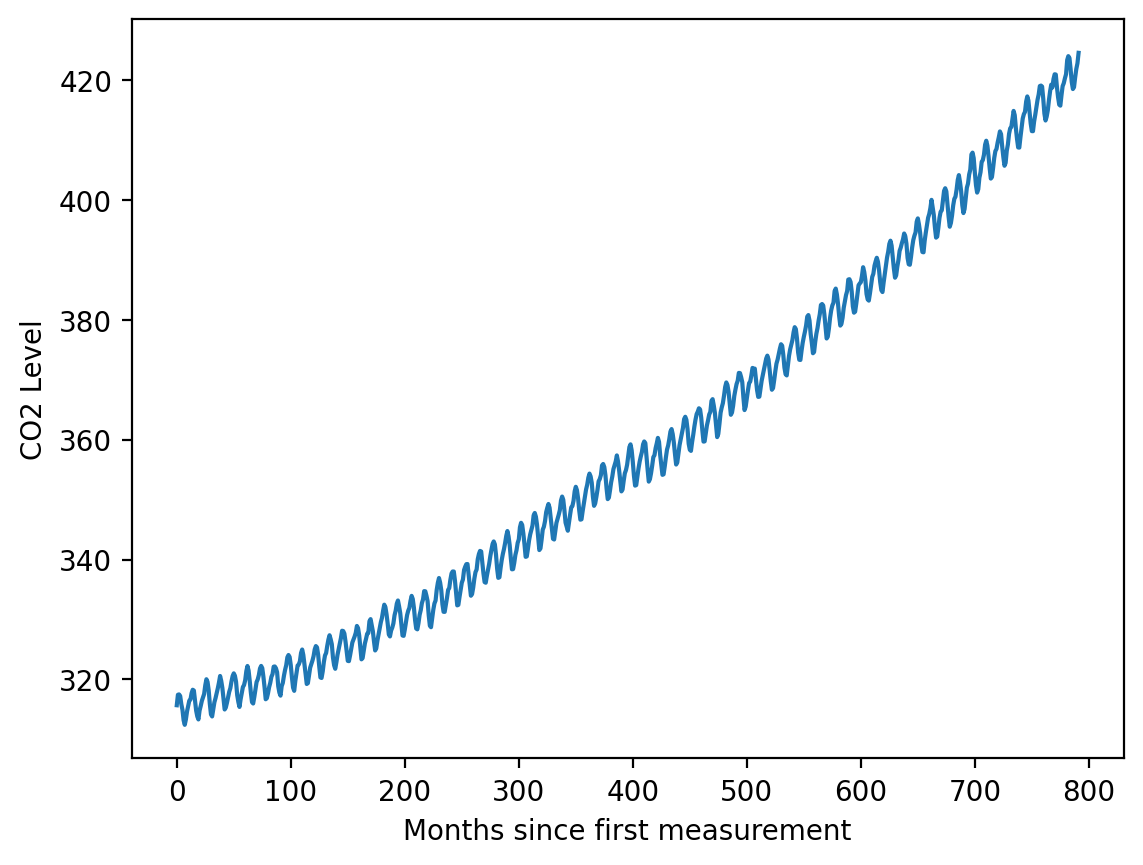

In [19]:
# Create X and y

# X = months since first measurement

X = np.array(range(len(df)))
y = df.average.values
y1=y
y1=y1.tolist()
plt.plot(X, y)
plt.xlabel('Months since first measurement')
plt.ylabel('CO2 Level')

In [20]:
# Spliting the data into train and test, 80:20 split
y = y.flatten().tolist()
split_index = int(0.8 * len(y))

train_data = y[:split_index]
X_train_data = X[:split_index]
test_data = y[split_index:]
X_test_data = X[split_index:]
X_test_data1 = X[split_index:]
test_data1 = y[split_index:]

In [21]:
import torch
X=[]
Y=[]
X1=[]
Y1=[]
K=5
T=1
for i in range(0,len(X_train_data)-K-T+1):
    x=X_train_data[i:i+K]
    y=train_data[i+K+T-1]
    X.append(x)
    Y.append(y)
for i in range(0,len(X_test_data)-K-T+1):
    x1=X_test_data[i:i+K]
    y1=test_data[i+K+T-1]
    X1.append(x1)
    Y1.append(y1)
X1=np.array(X1)
Y1=np.array(Y1)
X=np.array(X)
Y=np.array(Y)
X_train=torch.tensor(X,dtype=torch.float32)
Y_train=torch.tensor(Y,dtype=torch.float32).view(-1,1)
# print(X_train.shape,Y_train.shape)
X_test_data=torch.tensor(X_test_data,dtype=torch.float32)
test_data=torch.tensor(test_data,dtype=torch.float32)
# print(X_test_data.shape,test_data.shape)
X_test=torch.tensor(X1,dtype=torch.float32)
Y_test=torch.tensor(Y1,dtype=torch.float32).view(-1,1)
# print(X_test.shape,Y_test.shape)

In [22]:
import torch.nn as nn   
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size1,output_size):
        super(MLP,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size1)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(hidden_size1,hidden_size1)
        self.relu=nn.ReLU()
        self.linear3=nn.Linear(hidden_size1,hidden_size1)
        self.relu=nn.ReLU()
        self.linear4=nn.Linear(hidden_size1,output_size)
    def forward(self,x):
        out=self.linear1(x)
        out=self.relu(out)
        out=self.linear2(out)
        out=self.relu(out)
        out=self.linear3(out)
        out=self.relu(out)
        out=self.linear4(out)
        return out

In [23]:
input_size=K
hidden_size1=100
output_size=1
model=MLP(input_size,hidden_size1,output_size)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
n_iters=5000
losses=[]
for i in range(n_iters):
    Y_pred=model(X_train)
    loss=criterion(Y_pred,Y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print(f'Iteration {i}, loss is {loss}')
    losses.append(loss)
# plt.plot(range(n_iters),losses)
# plt.xlabel('Number of epochs')
# plt.ylabel('Loss')   
# plt.show()


Iteration 0, loss is 129270.5703125
Iteration 100, loss is 22088.419921875
Iteration 200, loss is 16977.50390625
Iteration 300, loss is 5938.33740234375
Iteration 400, loss is 34.76425552368164
Iteration 500, loss is 1316.5887451171875
Iteration 600, loss is 1042.5894775390625
Iteration 700, loss is 74.59420776367188
Iteration 800, loss is 43.66099548339844
Iteration 900, loss is 53.266700744628906
Iteration 1000, loss is 488.0349426269531
Iteration 1100, loss is 1109.2724609375
Iteration 1200, loss is 125.84148406982422
Iteration 1300, loss is 14.435041427612305
Iteration 1400, loss is 11.273597717285156
Iteration 1500, loss is 9.751275062561035
Iteration 1600, loss is 47.17545700073242
Iteration 1700, loss is 77.63556671142578
Iteration 1800, loss is 100.4688720703125
Iteration 1900, loss is 347.6245422363281
Iteration 2000, loss is 8082.7978515625
Iteration 2100, loss is 454.8838195800781
Iteration 2200, loss is 68.26648712158203
Iteration 2300, loss is 10.176691055297852
Iteration 

In [24]:
with torch.no_grad():
    pred=model(X_test)
    test_pred=model(X_test_data[0:5])
    print(test_pred)
    print(test_data[5:6])
    MSE_mlp=mean_squared_error(test_data[5:6],test_pred)
    print(f'Mean Squared Error of MLP is {MSE_mlp}')

tensor([401.8200])
tensor([394.4100])
Mean Squared Error of MLP is 54.9077033996582


#### Moving Average

In [25]:
test_data1 = pd.Series(test_data1)
ma_pred = test_data1.rolling(window=K).mean().shift(T)

print(f'Moving average prediction for the future:{ma_pred[K+T-1]}')
print(f'True value for the future : {test_data1[K+T-1]}')
MSE_ma=np.mean((ma_pred[K+T-1]-test_data1[K+T-1])**2)
print(f'Mean Squared Error of Moving Average is {MSE_ma}')

Moving average prediction for the future:391.956
True value for the future : 394.41
Mean Squared Error of Moving Average is 6.022116000000038


#### ARMA Model

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
arma_model=ARIMA(y1[:628],order=(5,0,1))
arma_model_fit=arma_model.fit()
arma_pred_all=arma_model_fit.forecast(steps=154)
#predict index 6 th value
arma_pred_next=arma_model_fit.predict(start=638,end=639)
print(f'ARMA prediction for the future:{arma_pred_next[0]}')
print(f'True value for the future : {y1[638]}')
MSE_arma=np.mean((arma_pred_next[0]-y1[638])**2)
print(f'Mean Squared Error of ARMA is {MSE_arma}')

TypeError: 'float' object is not subscriptable

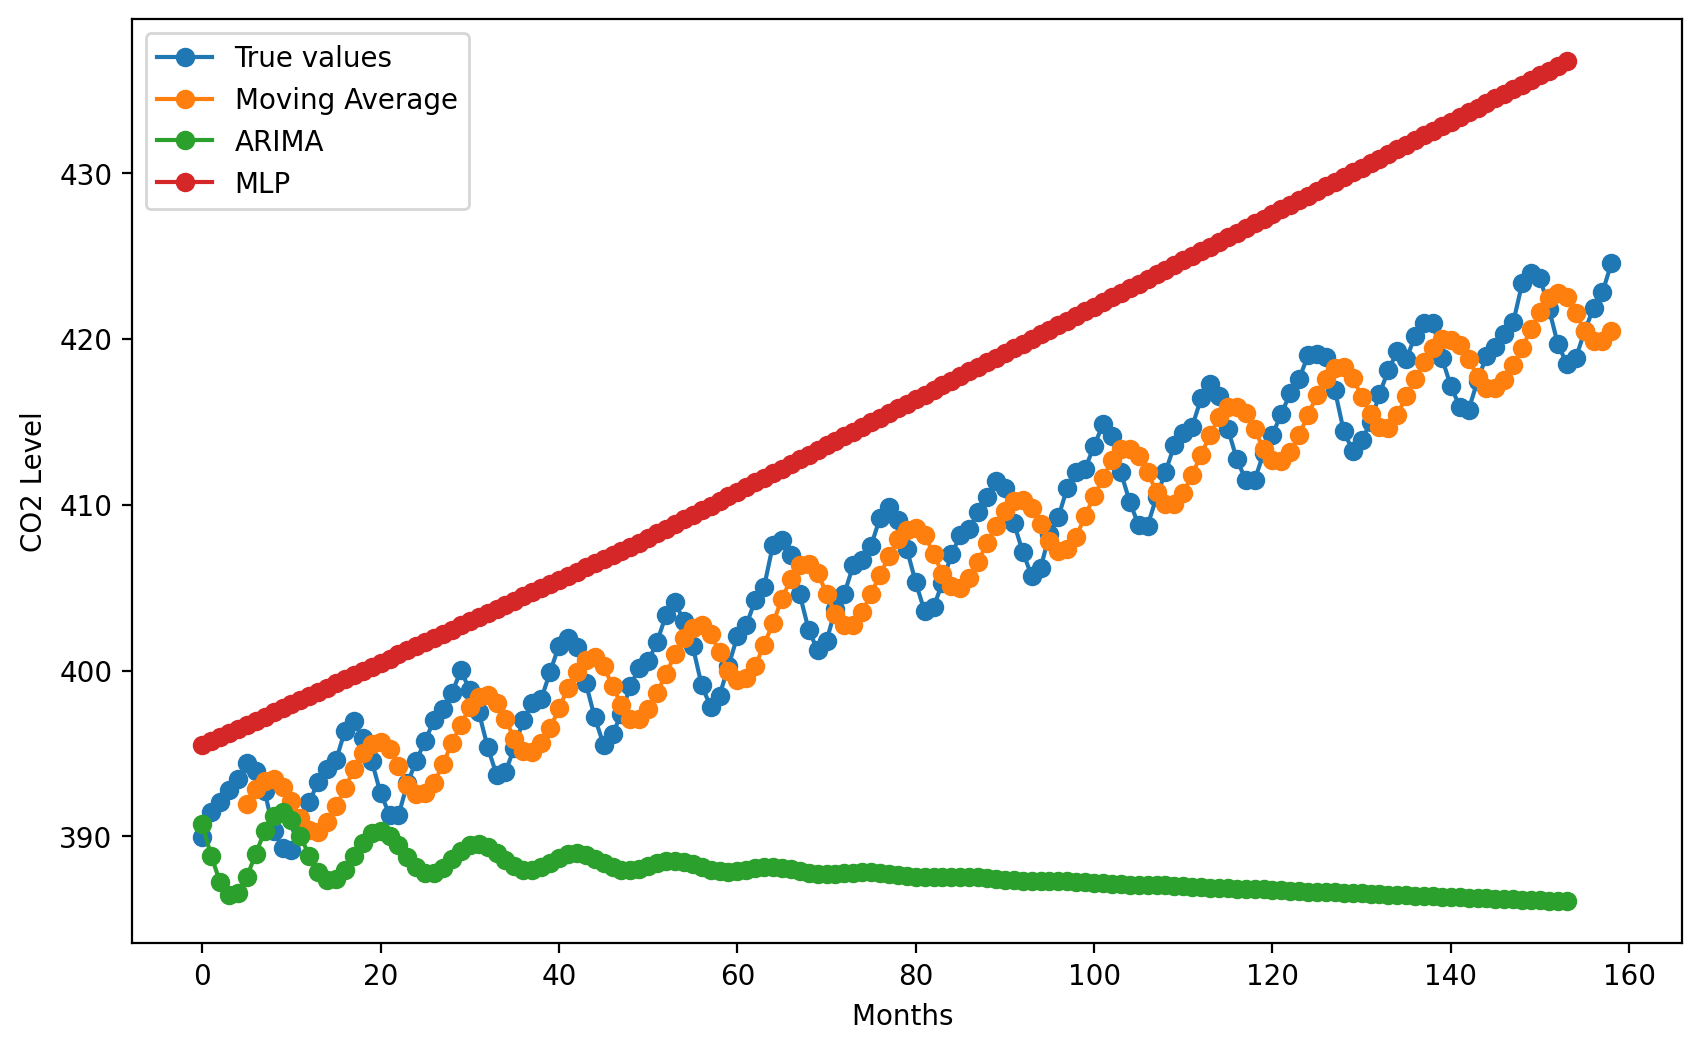

In [ ]:
#plot the predictions
plt.figure(figsize=(10,6))
plt.plot(test_data1,label='True values',marker='o')
plt.plot(ma_pred,label='Moving Average',marker='o')
plt.plot(arma_pred_all,label='ARIMA',marker='o')
plt.plot(pred.detach().numpy(),label='MLP',marker='o')
plt.xlabel('Months ')
plt.ylabel('CO2 Level')
plt.legend()